In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import struct
import matplotlib.pyplot as plt
%matplotlib inline 
import math
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train-labels.idx1-ubyte
/kaggle/input/t10k-images.idx3-ubyte
/kaggle/input/t10k-labels.idx1-ubyte
/kaggle/input/train-images.idx3-ubyte


In [2]:
def idxtonumpyarray(filename):
  with open(filename, 'rb') as file:
    magic, size = struct.unpack(">II",file.read(8))
    if (magic == 2049):
      dataset = np.fromfile(file, dtype=np.dtype(np.uint8).newbyteorder('>'))
      return dataset;

    rows, cols = struct.unpack(">II",file.read(8))
    dataset = np.fromfile(file, dtype=np.dtype(np.uint8).newbyteorder('>'))
    return dataset.reshape(size, rows*cols),dataset.reshape(size, rows,cols)
    

In [3]:
def sigmoid(z, derive=False):
  return  sigmoid(z)*(1-sigmoid(z)) if derive else 1.0/(1.0+np.exp(-z));

In [4]:
def relu1(z, derive = False):
  return np.greater(z, 0).astype(int) if derive else np.maximum(0,z)

In [5]:
def mse(y, y_hat): return ((y-y_hat)**2).mean()

In [6]:
train_images, notreshaped_train_images = idxtonumpyarray("/kaggle/input/train-images.idx3-ubyte")
train_labels = idxtonumpyarray("/kaggle/input/train-labels.idx1-ubyte")

In [7]:
input_layer = train_images.shape[1];
hidden_layer_1_size = 30;
hidden_layer_2_size = 50;
output_layer = 10;

In [8]:
theta1 = np.random.randn(hidden_layer_1_size, train_images.shape[1]+1);
theta2 = np.random.randn(hidden_layer_2_size, hidden_layer_1_size+1)
theta3 = np.random.randn(output_layer, hidden_layer_2_size+1)


y_matrix = np.eye(output_layer)[train_labels]

ones = np.ones((train_images.shape[0],1), dtype=int)

X = np.c_[ones,train_images]


In [9]:
lr = 1e-4

In [10]:
for i in range(3000):
  a1 = X

  z2 = X@theta1.T

  a2 = sigmoid(z2)
  #a2 = relu1(z2)

  ones = np.ones((a2.shape[0],1), dtype=float)
  a2= np.c_[ones,a2]

  z3 = a2@theta2.T

  a3 = sigmoid(z3)
  #a3 = relu1(z3)

  ones = np.ones((a3.shape[0],1), dtype=float)
  a3= np.c_[ones,a3]

  z4 = a3@theta3.T
  a4=sigmoid(z4)
  #a4 = relu1(z4)

  J = mse(y_matrix,a4)

  
  print(J)
  

  d4 = y_matrix - a4

  d3 = (d4@theta3[:,1:] * sigmoid(z3,True))
  #d3 = (d4@theta3[:,1:] * relu1(z3,True))

  d2 = (d3@theta2[:,1:] * sigmoid(z2,True))
  #d2 = (d3@theta2[:,1:] * relu1(z2,True))

  Delta1 = d2.T @ a1
  Delta2 = d3.T @ a2
  Delta3 = d4.T @ a3


  theta1 = theta1 + (lr* Delta1)
  theta2 = theta2 + (lr* Delta2)
  theta3 = theta3 + (lr * Delta3)

 
    


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.4368398501853279
0.30618573523679415
0.09960585676613089
0.1729936367793465
0.09943511404145927
0.1048249948704921
0.09861088939552627
0.10572771608712629
0.09665705034555491
0.09477883269324369
0.09376820408714732
0.09375909914886504
0.09475919345756113
0.09605000103986387
0.09527041154414789
0.09512098663319725
0.09493319550332445
0.09548431627052474
0.09419926001501938
0.09363485902233132
0.09322095216777618
0.09363740467832476
0.0870480971387371
0.08753967768294836
0.09816169636164356
0.0988439051086084
0.09603584360053959
0.0937265252797689
0.08794064610040682
0.09186177514502768
0.08577935540318904
0.09661978337942342
0.08976208030247035
0.08631938336965164
0.08053441871781523
0.07972464342668538
0.07786728613440923
0.08001245559897839
0.08266598214963099
0.0870064745713449
0.085449210618541
0.08416934600920008
0.0745089909448559
0.07582082091761995
0.07887947376698587
0.08479310427454759
0.07724638648862585
0.07724790163189091
0.07532450541387753
0.07616705442445965
0.07449300

Predicted:5
Actual:5


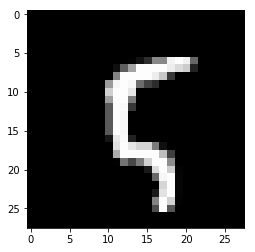

In [11]:
la = 100
a4[9]
print("Predicted:"+ np.array2string(np.argmax(a4[la])))
y_matrix[0]
print("Actual:" + np.array2string(np.argmax(y_matrix[la])))

plt.imshow(notreshaped_train_images[la,:,:], cmap='gray')
plt.show()

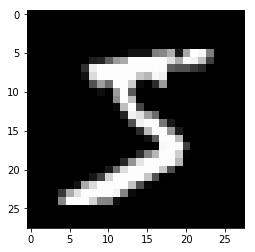

In [12]:
plt.imshow(notreshaped_train_images[0,:,:], cmap='gray')
plt.show()